In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline

In [2]:
df=pd.read_csv("Decision.csv",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','Salary'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [6]:
dfs=df.select_dtypes(include=object).drop('Salary',axis=1)

In [7]:
e = dfs.apply(le.fit_transform)

In [8]:
ohe.fit_transform(e)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [9]:
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer()
label_binarizer.fit(dfs.columns)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [10]:
s=df.drop(["age","capital-gain","capital-loss","hours-per-week","Salary"],axis=1)

In [11]:
#split the data into train & test using a random state. 
#taking all columns as IV and <=50K as Dependent variable

#before splitting we wil create dummy variables---
df1=pd.get_dummies((df.drop(["age","capital-gain","capital-loss","hours-per-week","Salary"],axis=1)),drop_first=True)
df_new=pd.concat([df,df1],axis=1)
df_new.reset_index(inplace=True,drop=True)
print (df_new.columns)
#not including fnlwgt(some weight) & workclass n my model as they have too many categories
df2=df_new.drop(["workclass",'fnlwgt',"education","marital-status","occupation","relationship","race","sex","native-country"],axis=1)
df2.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=111)


,age,education-num,capital-gain,capital-loss,hours-per-week,Salary,education-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,<=50K,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#creating the independent variables
indep=list(df2.columns)
indep.remove(indep[5])    #removes Salary as it is our DV
len(indep)

100

In [15]:
# the splitting process
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[indep],df2['Salary'],test_size=0.3,random_state=1)


In [16]:
from sklearn import tree
from sklearn.metrics import accuracy_score
#building a Decision tree and give the max_depth as a variable x. Keeping this Code in a loop, starting the
#variable from depth(x)=1 to depth x=50... 
#using this predicting on the train data and also on the test data....
#saving the accuracy for both train and test data INTO 2 VARIABLES (LISTS) and for each depth (1 to 50) and finally prepare 

train_A=[]
test_A=[]
for x in range(1,51):
    cl_tree1=tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=x)
    cl_tree1=cl_tree1.fit(X_train,y_train)
    pred_train=cl_tree1.predict(X_train)
    pred_test=cl_tree1.predict(X_test)
    train_A.append(accuracy_score(y_train,pred_train))
    test_A.append(accuracy_score(y_test,pred_test))


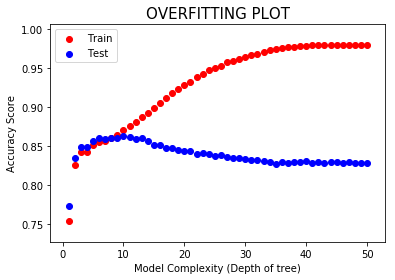

In [17]:
plt.scatter(range(1,51),train_A,color="red")
plt.scatter(range(1,51),test_A,color="blue")
plt.title("OVERFITTING PLOT",{'fontsize': 15})
plt.xlabel("Model Complexity (Depth of tree)")
plt.ylabel("Accuracy Score")
plt.legend(["Train","Test"])

In [20]:
indepv=list(df2.columns)

In [82]:
import os
import pydot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [84]:
cl_tree2=tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=10)
cl_tree2=cl_tree2.fit(X_train,y_train)
pred_train=cl_tree2.predict(X_train)
pred_test=cl_tree2.predict(X_test)
dot_data = tree.export_graphviz(cl_tree2, out_file=None,feature_names=X_train.columns,class_names='Salary',filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)  
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_pdf("50K.pdf")

In [85]:
cl_tree2=tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3)
cl_tree2=cl_tree2.fit(X_train,y_train)
pred_train=cl_tree2.predict(X_train)
pred_test=cl_tree2.predict(X_test)
dot_data = tree.export_graphviz(cl_tree2, out_file=None,feature_names=X_train.columns,class_names='Salary',filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)  
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png("50K_depth3.png")

In [97]:
print (pd.crosstab(y_train,pred_train) )
print ("\n")
print (pd.crosstab(y_test,pred_test) )

col_0   <=50K  >50K
Salary             
<=50K   16302   868
>50K     2734  2888


col_0   <=50K  >50K
Salary             
<=50K    7145   405
>50K     1076  1143


In [98]:
X_test.columns

Index(['age', 'education-num', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education-num', 'education-num',
       'workclass_Federal-gov', 'workclass_Local-gov',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=102)

In [99]:
#Predictions on new data
new=df2[indep].sample(5)
cl_tree2.predict(new)

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)